In [25]:
import pandas as pd
import numpy as np
import time

dataset_process = pd.read_csv("Base_6_unida_1000_a4.csv", delimiter=';')
X = dataset_process.loc[: , dataset_process.columns != 'failure'].values
y = dataset_process["failure"].values

len(dataset_process.columns)

3

In [26]:
display(dataset_process)

,a4,load,failure
0,3.101977,0,0
1,3.577366,0,0
2,2.940574,0,0
3,3.352785,0,0
4,3.712539,0,0
...,...,...,...
2004,5.026991,90,1
2005,4.538569,90,1
2006,5.288770,90,1
2007,5.058880,90,1


In [27]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [51]:
len(X_train)

1607

In [52]:
len(X_test)

402

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)

In [57]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [58]:
knn.score(X_test, y_test)

0.5398009950248757

In [59]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[109,  90],
       [ 95, 108]], dtype=int64)

Text(42.0, 0.5, 'Truth')

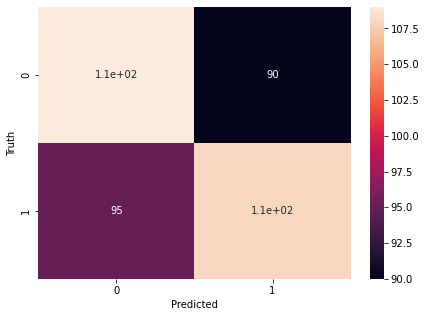

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.55      0.54       199
           1       0.55      0.53      0.54       203

    accuracy                           0.54       402
   macro avg       0.54      0.54      0.54       402
weighted avg       0.54      0.54      0.54       402



In [62]:
knn.predict([[-1.2,30]])

array([1], dtype=int64)

In [63]:
df0 = dataset_process[:1009]
df1 = dataset_process[1009:]


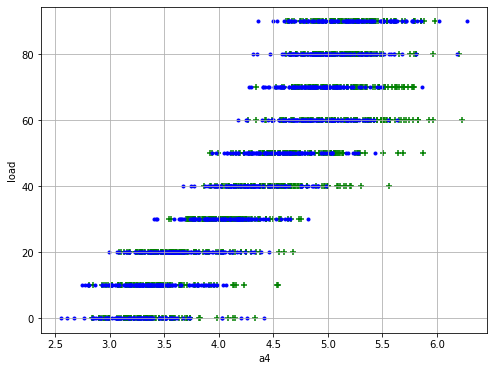

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
#plt.scatter(X[:,0],X[:,2])
plt.scatter(df0['a4'], df0['load'],color="green",marker='+')
plt.scatter(df1['a4'], df1['load'],color="blue",marker='.')
plt.ylabel('load')
plt.xlabel('a4')
plt.grid()
